<h4> OBJECTIVE </h4>

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?

___

<h4> IMPORTING REQUIRED LIBRARIES

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4> IMPORTING THE DATASET

In [2]:
# Importing dataset
storedataset = pd.read_excel('superstore_sales.xlsx')

In [3]:
#data audit
storedataset.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [4]:
#shape of the dataset
storedataset.shape

(51290, 21)

In [5]:
#columns present in the data set
storedataset.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
# summary of the data set.
storedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

Now we can do further analysis on our data to answer our questions. Before that, chech the null values.

In [7]:
# Checking missing values
storedataset.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. From here you can see the following statistics:

1. Row count, which aligns to what the shape attribute showed us.
2. The mean, or average.
3. The standard deviation, or how spread out the data is.
4. The minimum and maximum value of each column
5. The number of items that fall within the first, second, and third percentiles.

In [8]:
# Generating descriptive statistics summary
storedataset.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


<h4> EXPLORATORY DATA ANALYSIS</h4>

- WHAT IS THE OVERALL SALES TREND?

In [9]:
storedataset['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
storedataset['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [11]:
# month and year from dataset
storedataset['month_year'] = storedataset['order_date'].apply(lambda x: x.strftime('%Y-%m'))
storedataset['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [12]:
# grouping month_year by sales
df_trend = storedataset.groupby('month_year').sum()['sales'].reset_index()

In [13]:
df_trend.head(2)

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698


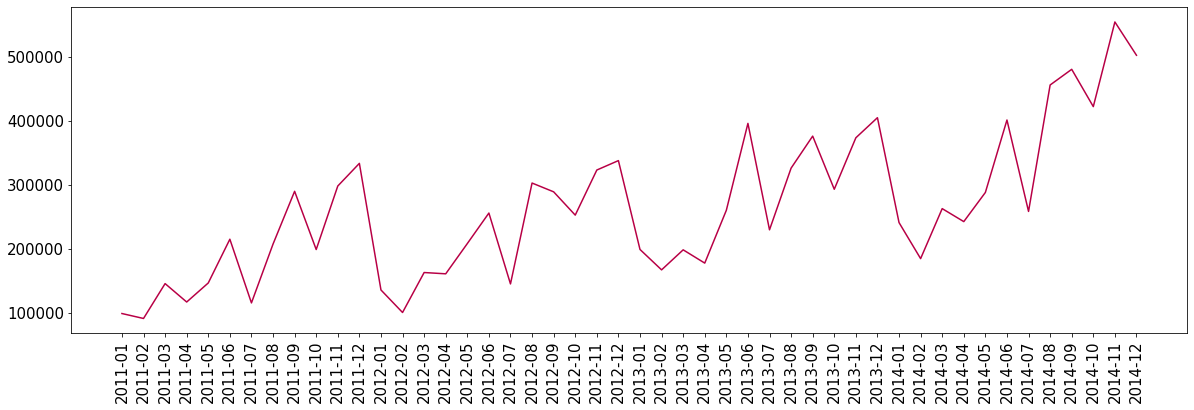

In [14]:
# Setting the figure size and plot
plt.figure(figsize=(20, 6))
plt.plot(df_trend['month_year'], df_trend['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.show()

<h4> which are the 10 products by sales?

In [15]:
# Grouping product name column.
storedataset.groupby('product_name').sum()['sales']
product_sales=pd.DataFrame(storedataset.groupby('product_name').sum()['sales'])

In [16]:
#sorting decending order
ps=product_sales.sort_values('sales', ascending= False)
ps

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800


In [17]:
#top 10 products by sales
ps[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h4> Which are the most selling Products

In [18]:
s_p=pd.DataFrame(storedataset.groupby('product_name').sum()['quantity'])
s_p=s_p.sort_values('quantity', ascending= False)

In [19]:
s_p=s_p.head(20)
s_p

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


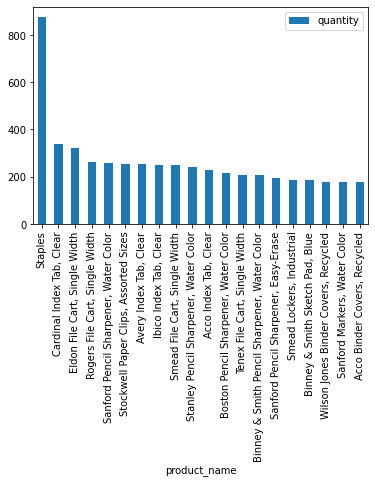

In [20]:
s_p.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

<h4> Which is the most preferred Ship Mode?

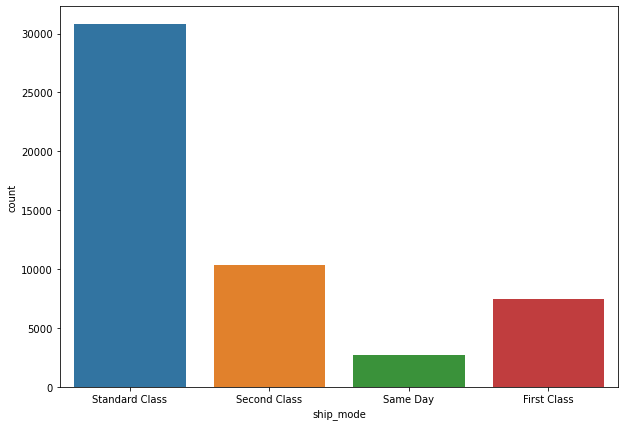

In [21]:
#plotting shipmode
plt.figure(figsize=(10,7))

sns.countplot(x='ship_mode', data=storedataset)
#sns.countplot(storedataset['ship_mode'])
plt.show()

<h4> Which are the Most Profitable Category and Sub-Category?

In [22]:
#Grouping category and sub category
cat_Profit=pd.DataFrame(storedataset.groupby(['category','sub_category']).sum()['profit'])

In [23]:
Profit=cat_Profit.sort_values('profit',ascending= False)
Profit

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Office Supplies Appliances    141680.58940
Technology      Accessories   129626.30620
Office Supplies Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
Technology      Machines       58867.87300
Office Supplies Art            57953.91090
Furniture       Furnishings    46967.42550
Office Supplies Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Tables        -64083.38870